In [1]:
pip install -q nlu

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [58]:
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 9.4 MB/s eta 0:00:011     |███████████████████████████▏    | 25.7 MB 10.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [56]:
%pip install transformers
%pip install sentencepiece

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 7.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

%pip install textblob
%pip install seaborn
%pip install transformers
%pip install wordcloud
%pip install torch

zsh:1: command not found: pip
zsh:1: command not found: pip
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/

In [3]:
pip install googletrans==4.0.0-rc1

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from googletrans import Translator
import re
from textblob import TextBlob
import seaborn as sns
%matplotlib inline
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import torch
# If you still get "No module named 'seaborn'" after running %pip install seaborn,
# restart the Jupyter kernel and run the cell again.
from collections import defaultdict

/Users/vaishnavivishwasmane/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('/Users/vaishnavivishwasmane/Git Repository/NLP-Sentiment-Analysis-Project/NLP_Project .csv')  # Make sure the file 'NLP_Project.csv' exists in your working directory

In [6]:
df

,Date,Year,City,Language,Newspaper_Name,Topic,Article
0,07/24/2019,2019,Mumbai,English,Mumbai Mirror,Farming and climate change,An economic survey noted that the average inco...
1,10/15/2019,2019,Mumbai,English,Mumbai Mirror,Children as champions of climate change,Talk of coincidences and Bijal Vachharajani’s ...
2,10/31/2019,2019,Mumbai,English,Mumbai Mirror,Mumbai could go under water by 2050,International study gives new estimates on the...
3,06/05/2020,2020,Mumbai,English,Mumbai Mirror,"Clean air is our right: On Environment Day, cl...","For over two months, the country has been unde..."
4,11/25/2019,2019,Mumbai,English,NPR,Mangroves help fight the effects of climate ch...,Bare trees with slender branches line a half-b...
5,09/03/2021,2021,Mumbai,English,Hindustan Times,"Since 2019, Maharashtra spent ₹ 14K-crore as c...","The number is, however, a gross underestimatio..."
6,09/29/2019,2019,Mumbai,English,Times of India,Mumbai: Five extremely heavy rain days in Mons...,MUMBAI: The city recorded as many as five “ext...
7,03/21/2021,2021,Mumbai,English,Mumbai Mirror,"Maharashtra: Warmer conditions, extreme weathe...",While farmers from Maharashtra continue to fac...
8,05/05/2018,2018,Mumbai,Marathi,Maharashtra Times,हवामानबदल आणि तापमानवाढ\n,गेल्या अनेक वर्षांपासून आपण वाढते तापमान अनुभव...
9,05/01/2023,2023,Hyderabad,English,Deccan Cronicles,Experts blame climate change for intense rains...,HYDERABAD: The unseasonal downpours and hailst...


In [7]:
df.dtypes

Date              object
Year               int64
City              object
Language          object
Newspaper_Name    object
Topic             object
Article           object
dtype: object

In [8]:
translator = Translator()

def translate_to_english(row):
    if row['Language'] == 'Marathi':
        translation = translator.translate(row['Article'], src='mr', dest='en')
        return translation.text
    elif row['Language'] == 'Telugu':
        translation = translator.translate(row['Article'], src='te', dest='en')
        return translation.text
    elif row['Language'] == 'Tamil':
        translation = translator.translate(row['Article'], src='ta', dest='en')
        return translation.text
    else:
        return row['Article']

df['Translated_Article'] = df.apply(translate_to_english, axis=1)

In [9]:
df

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article
0,07/24/2019,2019,Mumbai,English,Mumbai Mirror,Farming and climate change,An economic survey noted that the average inco...,An economic survey noted that the average inco...
1,10/15/2019,2019,Mumbai,English,Mumbai Mirror,Children as champions of climate change,Talk of coincidences and Bijal Vachharajani’s ...,Talk of coincidences and Bijal Vachharajani’s ...
2,10/31/2019,2019,Mumbai,English,Mumbai Mirror,Mumbai could go under water by 2050,International study gives new estimates on the...,International study gives new estimates on the...
3,06/05/2020,2020,Mumbai,English,Mumbai Mirror,"Clean air is our right: On Environment Day, cl...","For over two months, the country has been unde...","For over two months, the country has been unde..."
4,11/25/2019,2019,Mumbai,English,NPR,Mangroves help fight the effects of climate ch...,Bare trees with slender branches line a half-b...,Bare trees with slender branches line a half-b...
5,09/03/2021,2021,Mumbai,English,Hindustan Times,"Since 2019, Maharashtra spent ₹ 14K-crore as c...","The number is, however, a gross underestimatio...","The number is, however, a gross underestimatio..."
6,09/29/2019,2019,Mumbai,English,Times of India,Mumbai: Five extremely heavy rain days in Mons...,MUMBAI: The city recorded as many as five “ext...,MUMBAI: The city recorded as many as five “ext...
7,03/21/2021,2021,Mumbai,English,Mumbai Mirror,"Maharashtra: Warmer conditions, extreme weathe...",While farmers from Maharashtra continue to fac...,While farmers from Maharashtra continue to fac...
8,05/05/2018,2018,Mumbai,Marathi,Maharashtra Times,हवामानबदल आणि तापमानवाढ\n,गेल्या अनेक वर्षांपासून आपण वाढते तापमान अनुभव...,"For the past several years, we have been exper..."
9,05/01/2023,2023,Hyderabad,English,Deccan Cronicles,Experts blame climate change for intense rains...,HYDERABAD: The unseasonal downpours and hailst...,HYDERABAD: The unseasonal downpours and hailst...


In [10]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text

# Applying the clean_text function
df['Translated_Article'] = df['Translated_Article'].apply(clean_text)
df

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article
0,07/24/2019,2019,Mumbai,English,Mumbai Mirror,Farming and climate change,An economic survey noted that the average inco...,an economic survey noted that the average inco...
1,10/15/2019,2019,Mumbai,English,Mumbai Mirror,Children as champions of climate change,Talk of coincidences and Bijal Vachharajani’s ...,talk of coincidences and bijal vachharajanis l...
2,10/31/2019,2019,Mumbai,English,Mumbai Mirror,Mumbai could go under water by 2050,International study gives new estimates on the...,international study gives new estimates on the...
3,06/05/2020,2020,Mumbai,English,Mumbai Mirror,"Clean air is our right: On Environment Day, cl...","For over two months, the country has been unde...",for over two months the country has been under...
4,11/25/2019,2019,Mumbai,English,NPR,Mangroves help fight the effects of climate ch...,Bare trees with slender branches line a half-b...,bare trees with slender branches line a halfbu...
5,09/03/2021,2021,Mumbai,English,Hindustan Times,"Since 2019, Maharashtra spent ₹ 14K-crore as c...","The number is, however, a gross underestimatio...",the number is however a gross underestimation ...
6,09/29/2019,2019,Mumbai,English,Times of India,Mumbai: Five extremely heavy rain days in Mons...,MUMBAI: The city recorded as many as five “ext...,mumbai the city recorded as many as five extre...
7,03/21/2021,2021,Mumbai,English,Mumbai Mirror,"Maharashtra: Warmer conditions, extreme weathe...",While farmers from Maharashtra continue to fac...,while farmers from maharashtra continue to fac...
8,05/05/2018,2018,Mumbai,Marathi,Maharashtra Times,हवामानबदल आणि तापमानवाढ\n,गेल्या अनेक वर्षांपासून आपण वाढते तापमान अनुभव...,for the past several years we have been experi...
9,05/01/2023,2023,Hyderabad,English,Deccan Cronicles,Experts blame climate change for intense rains...,HYDERABAD: The unseasonal downpours and hailst...,hyderabad the unseasonal downpours and hailsto...


In [11]:
df_mum=df.loc[df['City'] == 'Mumbai']
df_mum

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article
0,07/24/2019,2019,Mumbai,English,Mumbai Mirror,Farming and climate change,An economic survey noted that the average inco...,an economic survey noted that the average inco...
1,10/15/2019,2019,Mumbai,English,Mumbai Mirror,Children as champions of climate change,Talk of coincidences and Bijal Vachharajani’s ...,talk of coincidences and bijal vachharajanis l...
2,10/31/2019,2019,Mumbai,English,Mumbai Mirror,Mumbai could go under water by 2050,International study gives new estimates on the...,international study gives new estimates on the...
3,06/05/2020,2020,Mumbai,English,Mumbai Mirror,"Clean air is our right: On Environment Day, cl...","For over two months, the country has been unde...",for over two months the country has been under...
4,11/25/2019,2019,Mumbai,English,NPR,Mangroves help fight the effects of climate ch...,Bare trees with slender branches line a half-b...,bare trees with slender branches line a halfbu...
5,09/03/2021,2021,Mumbai,English,Hindustan Times,"Since 2019, Maharashtra spent ₹ 14K-crore as c...","The number is, however, a gross underestimatio...",the number is however a gross underestimation ...
6,09/29/2019,2019,Mumbai,English,Times of India,Mumbai: Five extremely heavy rain days in Mons...,MUMBAI: The city recorded as many as five “ext...,mumbai the city recorded as many as five extre...
7,03/21/2021,2021,Mumbai,English,Mumbai Mirror,"Maharashtra: Warmer conditions, extreme weathe...",While farmers from Maharashtra continue to fac...,while farmers from maharashtra continue to fac...
8,05/05/2018,2018,Mumbai,Marathi,Maharashtra Times,हवामानबदल आणि तापमानवाढ\n,गेल्या अनेक वर्षांपासून आपण वाढते तापमान अनुभव...,for the past several years we have been experi...


In [12]:
def show_wordcloud(data, title = None):
    stopwords = set(STOPWORDS)
    stopwords.update(["mumbai","India", "said", "year", "say",'maharashtra','state','climate','change','says','city','chennai','hyderabad','days','cities','telangana'])
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='black'
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

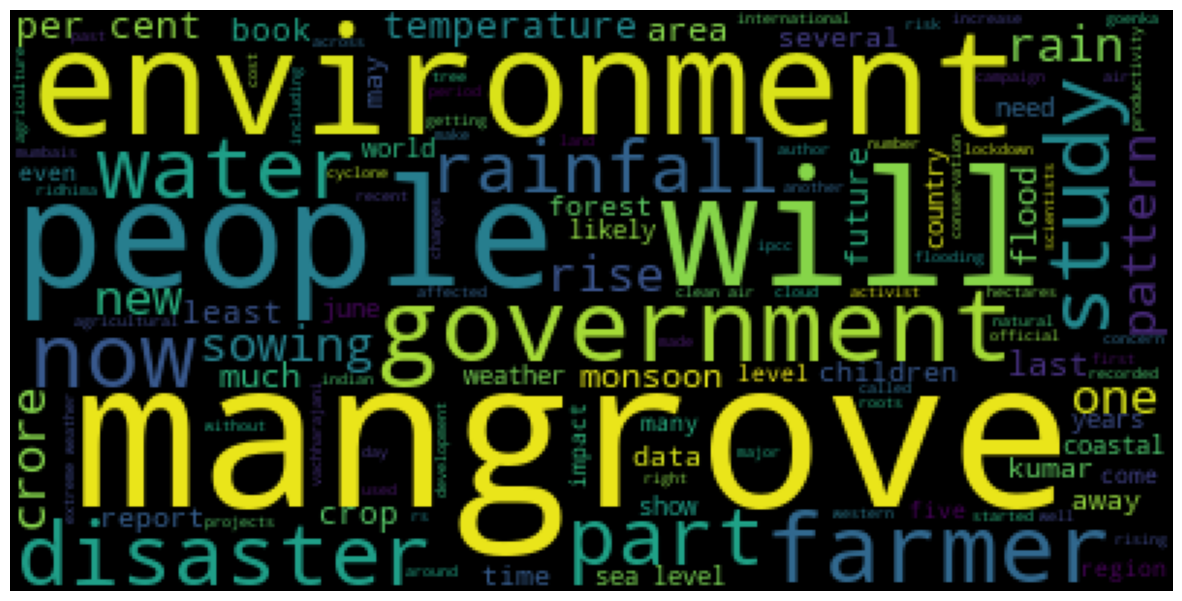

In [13]:
# Wordcloud for Articles From Mumbai.
show_wordcloud(df_mum["Translated_Article"].values)

In [14]:
df_Chen=df.loc[df['City'] == 'Chennai']
df_Chen

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article
18,11/11/2022,2022,Chennai,English,BBC news,Chennai rains: Can the city withstand another ...,Seven years after devastating floods killed mo...,seven years after devastating floods killed mo...
19,08/06/2019,2019,Chennai,English,CNBC,Rapid growth of India Chennai threatened by wa...,"CHENNAI, India (AP) — Dozens of billion-dollar...",chennai india ap dozens of billiondollar compa...
20,09/19/2022,2022,Chennai,English,NPR,"Climate change is here, and increasing microbu...",t is likely that climate change helped drive d...,t is likely that climate change helped drive d...
21,06/21/2019,2019,Chennai,English,NYT Chennai,"Chennai, an Indian City of Nearly\n5 Million, ...",The water is almost gone.\n\nSatellite photogr...,the water is almost gone satellite photographs...
22,08/28/2020,2020,Chennai,English,Times of India,Global warming to make Chennai monsoons severe,CHENNAI: Incidents of knee-deep pools forming ...,chennai incidents of kneedeep pools forming on...
23,12/26/2019,2019,Chennai,English,The Weather Channel,Rewind 2019: A Look Back at Significant Develo...,Chandrayaan-2 may have dominated popular imagi...,chandrayaan2 may have dominated popular imagin...
24,04/19/2023,2023,Chennai,Tamil,One India,அனலா தகி ய.. 2 நாக ஜிெலன ெப மைழ.. வானைலய ஹா அ ...,ெசைன: தமிநா இ நாைள ெவபநிைல அதிகபசமாக 2 த 3 கி ...,sena thamina essays is a maximum of 2 kg of di...
25,10/06/2023,2023,Chennai,Tamil,One India,ெந ஆப? ெசடப இவைர இலாத அதிகபச ெவப பதி.. ஆவாளக எ...,பா: உலக ெதாட ெவப மயமாகிெகாகிற எ வஞானக எச வத நி...,pa the world wide web the world wide web has b...


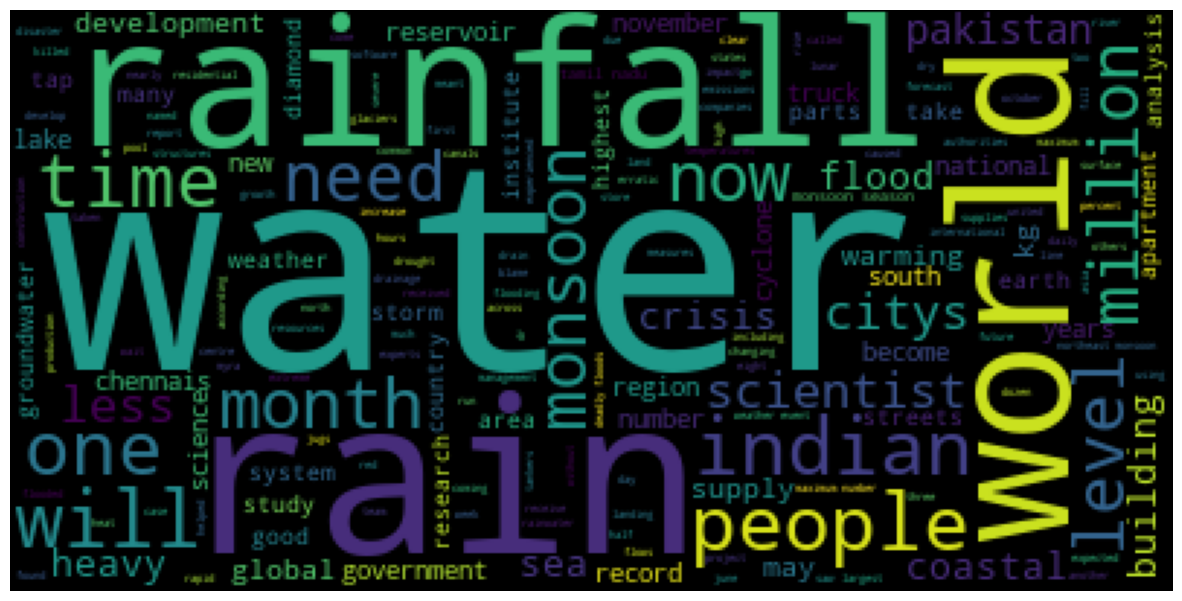

In [15]:
show_wordcloud(df_Chen["Translated_Article"].values)

In [16]:
df_hyd=df.loc[df['City'] == 'Hyderabad']
df_hyd

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article
9,05/01/2023,2023,Hyderabad,English,Deccan Cronicles,Experts blame climate change for intense rains...,HYDERABAD: The unseasonal downpours and hailst...,hyderabad the unseasonal downpours and hailsto...
10,10/19/2021,2021,Hyderabad,English,The news Minute,"Climate change is here, and increasing microbu...",Written by :Rajeswari Parasa\nPublished on : \...,written by rajeswari parasa published on 19 oc...
11,08/11/2021,2021,Hyderabad,English,Times of India,EPTRI to release mandal-level projections for...,HYDERABAD: Telangana State Climate Change Cent...,hyderabad telangana state climate change centr...
12,10/14/2020,2020,Hyderabad,English,Down to Earth,Telangana’s heavy showers have sure shot impri...,The unusually excessive rainfall that Telangan...,the unusually excessive rainfall that telangan...
13,07/19/2022,2022,Hyderabad,English,Times Now,Hyderabad reports no bad air quality days with...,Hyderabad: According to the most recent Parlia...,hyderabad according to the most recent parliam...
14,10/15/2020,2020,Hyderabad,English,Times of India,Hyderabad rains another example of extreme wea...,NEW DELHI: The October 13 flash floods in Tela...,new delhi the october 13 flash floods in telan...
15,08/27/2022,2022,Hyderabad,English,Scrolls newsletter,As Hyderabad grapples with extreme rainfall an...,"In the 2022 monsoon season, July turned out to...",in the 2022 monsoon season july turned out to ...
16,10/04/2023,2023,Hyderabad,Telugu,Namaste Telangana,ప‌త‌నం అంచున ప్ర‌పంచం : వాతావ‌ర‌ణ మార్పుల‌పై మ...,న్యూఢిల్లీ : ప‌ర్యావ‌ర‌ణ మార్పుల‌తో ప్ర‌పంచం క...,new delhi pope francis has appealed to those w...
17,08/10/2021,2021,Hyderabad,Telugu,Samayam,"వచ్చే ఇరవై ఏళ్లలో పెరగనున్న భూతాపం, అదే జరిగిత...",ప్రపంచవ్యాప్తంగా పెరిగిపోతున్న భూతాపంపై ఐక్యరా...,the report revealed by the united nations inte...


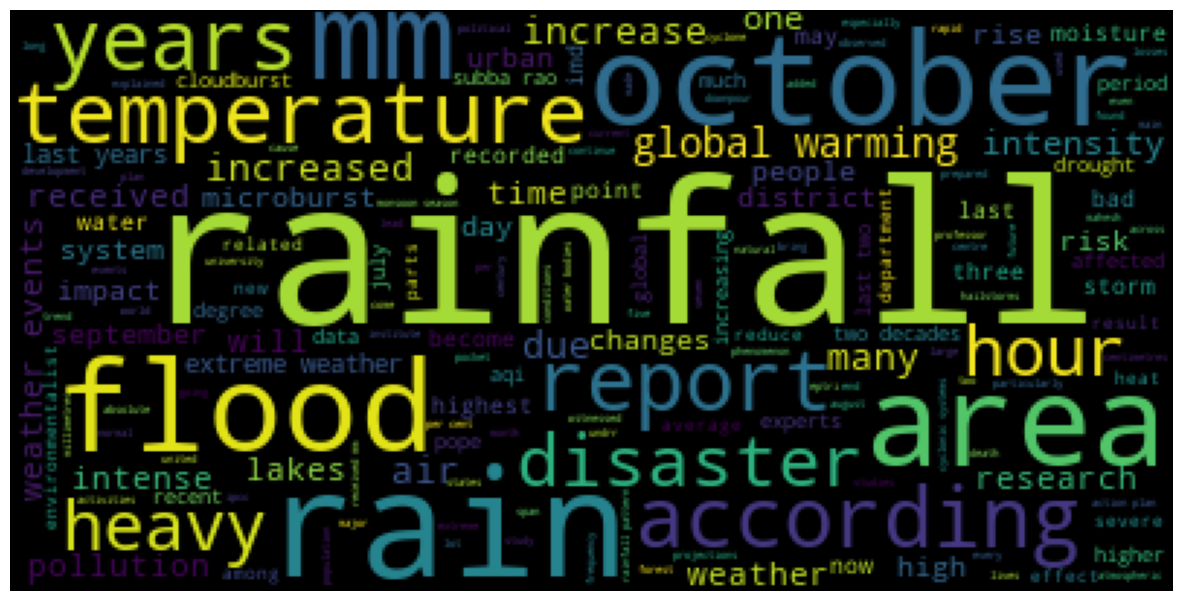

In [17]:
show_wordcloud(df_hyd["Translated_Article"].values)

In [18]:
#TextBlob for polarity and subjectivity
polarity=[]
subjectivity=[]
for txt in df['Translated_Article']:
    blobSenti=TextBlob(txt)
    polarity.append(blobSenti.sentiment.polarity)
    subjectivity.append(blobSenti.sentiment.subjectivity)
df['Polarity']=polarity
df['Subjectivity']=subjectivity


In [19]:
df

,Date,Year,City,Language,Newspaper_Name,Topic,Article,Translated_Article,Polarity,Subjectivity
0,07/24/2019,2019,Mumbai,English,Mumbai Mirror,Farming and climate change,An economic survey noted that the average inco...,an economic survey noted that the average inco...,0.031939,0.383992
1,10/15/2019,2019,Mumbai,English,Mumbai Mirror,Children as champions of climate change,Talk of coincidences and Bijal Vachharajani’s ...,talk of coincidences and bijal vachharajanis l...,0.018325,0.399436
2,10/31/2019,2019,Mumbai,English,Mumbai Mirror,Mumbai could go under water by 2050,International study gives new estimates on the...,international study gives new estimates on the...,0.068933,0.471552
3,06/05/2020,2020,Mumbai,English,Mumbai Mirror,"Clean air is our right: On Environment Day, cl...","For over two months, the country has been unde...",for over two months the country has been under...,0.166589,0.432949
4,11/25/2019,2019,Mumbai,English,NPR,Mangroves help fight the effects of climate ch...,Bare trees with slender branches line a half-b...,bare trees with slender branches line a halfbu...,0.052015,0.440720
5,09/03/2021,2021,Mumbai,English,Hindustan Times,"Since 2019, Maharashtra spent ₹ 14K-crore as c...","The number is, however, a gross underestimatio...",the number is however a gross underestimation ...,-0.043203,0.445365
6,09/29/2019,2019,Mumbai,English,Times of India,Mumbai: Five extremely heavy rain days in Mons...,MUMBAI: The city recorded as many as five “ext...,mumbai the city recorded as many as five extre...,0.020143,0.472907
7,03/21/2021,2021,Mumbai,English,Mumbai Mirror,"Maharashtra: Warmer conditions, extreme weathe...",While farmers from Maharashtra continue to fac...,while farmers from maharashtra continue to fac...,0.048423,0.604955
8,05/05/2018,2018,Mumbai,Marathi,Maharashtra Times,हवामानबदल आणि तापमानवाढ\n,गेल्या अनेक वर्षांपासून आपण वाढते तापमान अनुभव...,for the past several years we have been experi...,0.048873,0.404314
9,05/01/2023,2023,Hyderabad,English,Deccan Cronicles,Experts blame climate change for intense rains...,HYDERABAD: The unseasonal downpours and hailst...,hyderabad the unseasonal downpours and hailsto...,0.058763,0.471358


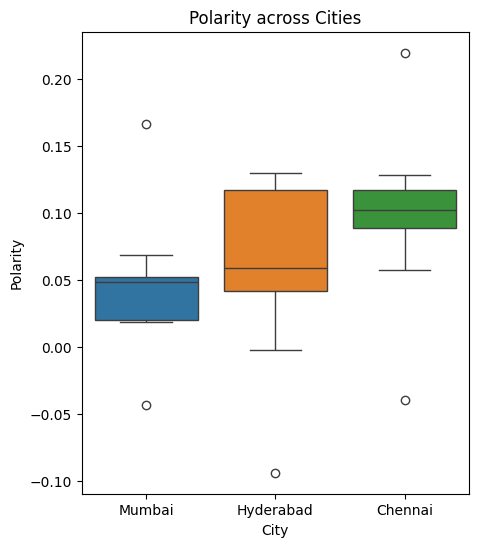

In [20]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x="City", y="Polarity", hue="City").set(title='Polarity across Cities')
plt.show()



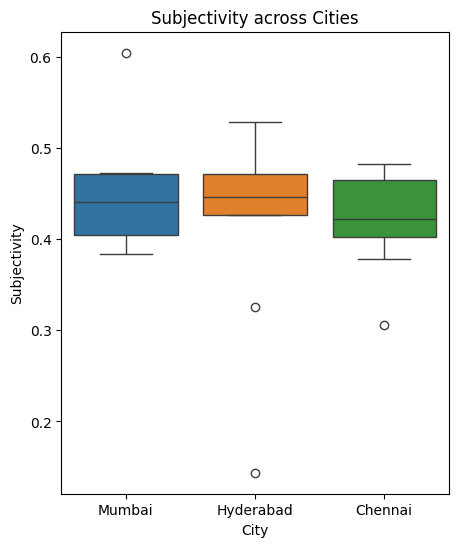

In [21]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x="City", y="Subjectivity", hue="City").set(title='Subjectivity across Cities')
plt.show()

In [22]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [23]:
labels = ['positive', 'neutral', 'negative']
posNeuNeg = defaultdict(list)

cities = ['Mumbai', 'Hyderabad', 'Chennai']

for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    posNeuNeg[city].append(scores)




In [24]:
posNeuNeg

defaultdict(list,
            {'Mumbai': [[0.7213029861450195,
               0.14592652022838593,
               0.13277050852775574]],
             'Hyderabad': [[0.4778386652469635,
               0.3539903461933136,
               0.1681709885597229]],
             'Chennai': [[0.5889469385147095,
               0.24599219858646393,
               0.1650608479976654]]})

In [25]:
pnn = pd.DataFrame.from_dict({city: values[0] for city, values in posNeuNeg.items()}, orient='index', columns=['Positive', 'Negative', 'Neutral'])

In [26]:
pnn

,Positive,Negative,Neutral
Mumbai,0.721303,0.145927,0.132771
Hyderabad,0.477839,0.353990,0.168171
Chennai,0.588947,0.245992,0.165061


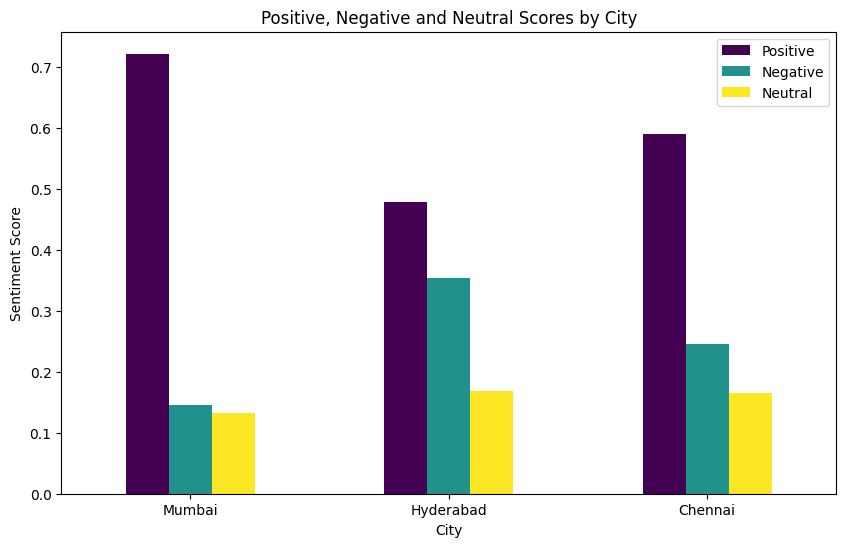

In [27]:
pnn.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Positive, Negative and Neutral Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

In [28]:
labels=['angry','fear','happy','sad','surprise']
emotions=defaultdict(list)


for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    emotions[city].append(scores)



In [29]:
emotions

defaultdict(list,
            {'Mumbai': [[0.3007742464542389,
               0.26966556906700134,
               0.24383649230003357,
               0.15154239535331726,
               0.03418131545186043]],
             'Hyderabad': [[0.2589842677116394,
               0.21227119863033295,
               0.2099744975566864,
               0.19399406015872955,
               0.12477601319551468]],
             'Chennai': [[0.24169358611106873,
               0.228847473859787,
               0.22813887894153595,
               0.2238824963569641,
               0.07743754982948303]]})

In [30]:
emo = pd.DataFrame.from_dict({city: values[0] for city, values in emotions.items()}, orient='index', columns=['angry','fear','happy','sad','surprise'])

In [31]:
emo

,angry,fear,happy,sad,surprise
Mumbai,0.300774,0.269666,0.243836,0.151542,0.034181
Hyderabad,0.258984,0.212271,0.209974,0.193994,0.124776
Chennai,0.241694,0.228847,0.228139,0.223882,0.077438


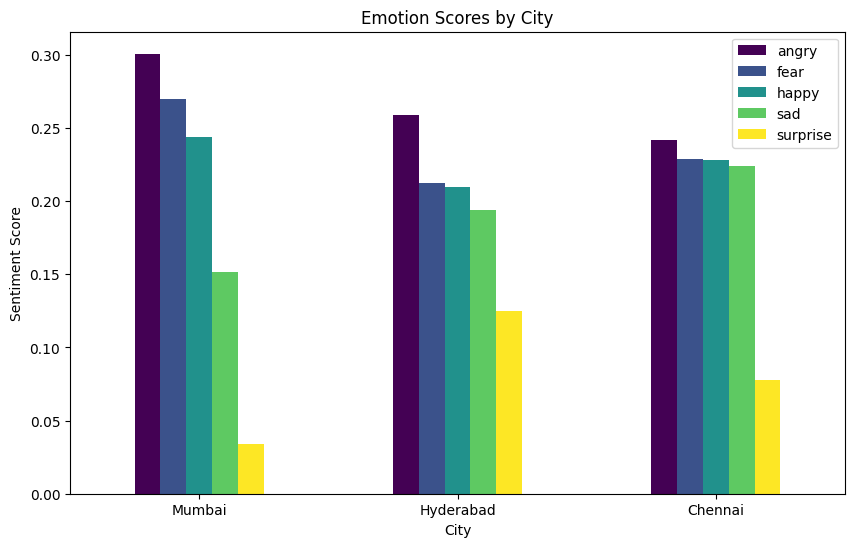

In [32]:
# Plotting
emo.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Emotion Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

In [33]:
labels=['Optimism','Injustice','disgust']
intent=defaultdict(list)


for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    intent[city].append(scores)


In [34]:
intt = pd.DataFrame.from_dict({city: values[0] for city, values in intent.items()}, orient='index', columns=labels)

In [35]:
intt

,Optimism,Injustice,disgust
Mumbai,0.448393,0.299156,0.252451
Hyderabad,0.375340,0.367376,0.257284
Chennai,0.418701,0.388765,0.192534


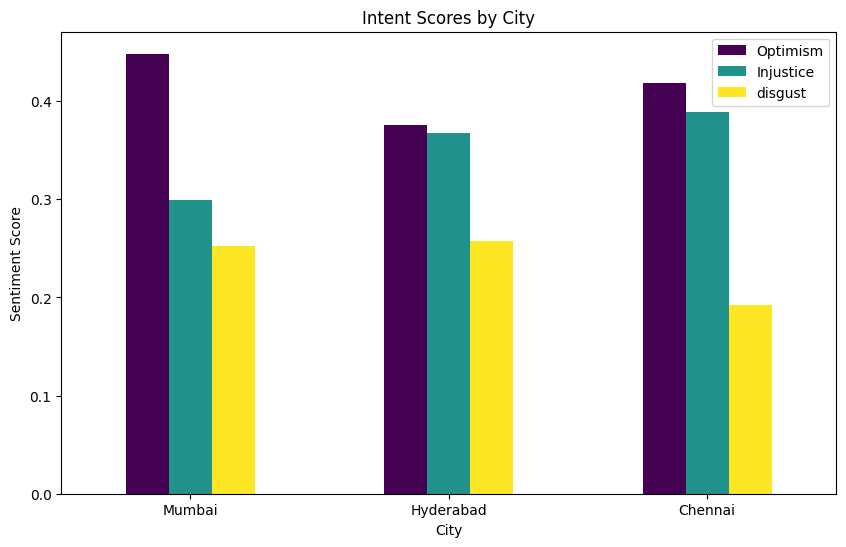

In [36]:
# Plotting
intt.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Intent Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

In [37]:

labels=['Cause','Impact','Mitigation','Adaption']
aspect=defaultdict(list)


for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    aspect[city].append(scores)

In [38]:
asp = pd.DataFrame.from_dict({city: values[0] for city, values in aspect.items()}, orient='index', columns=labels)

In [39]:
asp

,Cause,Impact,Mitigation,Adaption
Mumbai,0.298038,0.265577,0.257074,0.179312
Hyderabad,0.296407,0.287541,0.241969,0.174084
Chennai,0.270027,0.245321,0.244828,0.239824


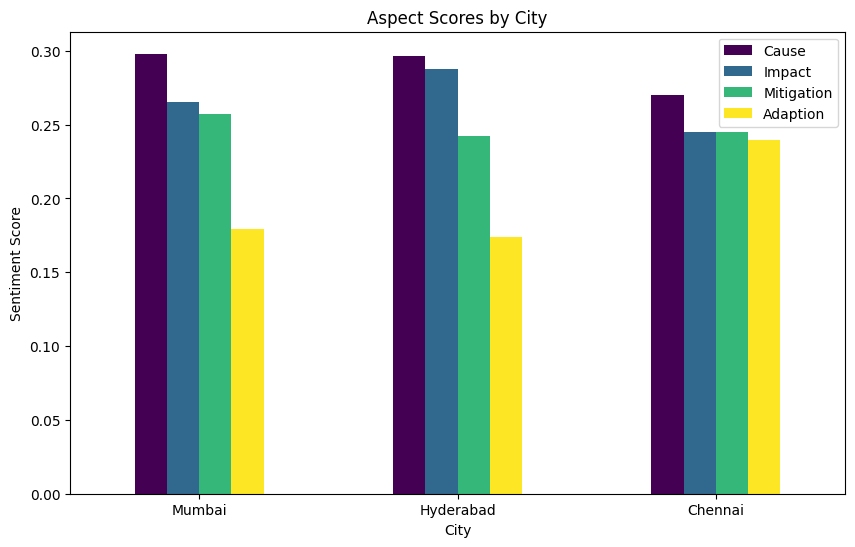

In [40]:
asp.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Aspect Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

In [41]:
labels=['Informed','Uninformed','Misinformed']
awarness=defaultdict(list)


for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    awarness[city].append(scores)

In [42]:
awar = pd.DataFrame.from_dict({city: values[0] for city, values in awarness.items()}, orient='index', columns=labels)

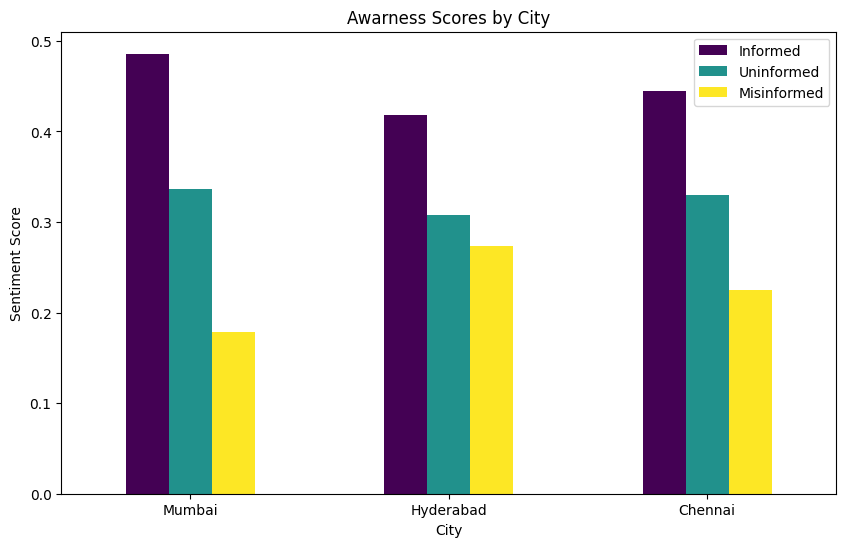

In [43]:
awar.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Awarness Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

In [44]:
labels=['Liberal','Conservative']
ideology=defaultdict(list)


for city in cities:
    sequence = " ".join(df.loc[df['City'] == city]['Translated_Article'])
    scores = classifier(sequence, labels)['scores']
    ideology[city].append(scores)

In [45]:
ideology

defaultdict(list,
            {'Mumbai': [[0.5629306435585022, 0.4370693564414978]],
             'Hyderabad': [[0.632002592086792, 0.3679974377155304]],
             'Chennai': [[0.5408759117126465, 0.4591240882873535]]})

In [46]:
idg = pd.DataFrame.from_dict({city: values[0] for city, values in ideology.items()}, orient='index', columns=labels)

In [47]:
idg

,Liberal,Conservative
Mumbai,0.562931,0.437069
Hyderabad,0.632003,0.367997
Chennai,0.540876,0.459124


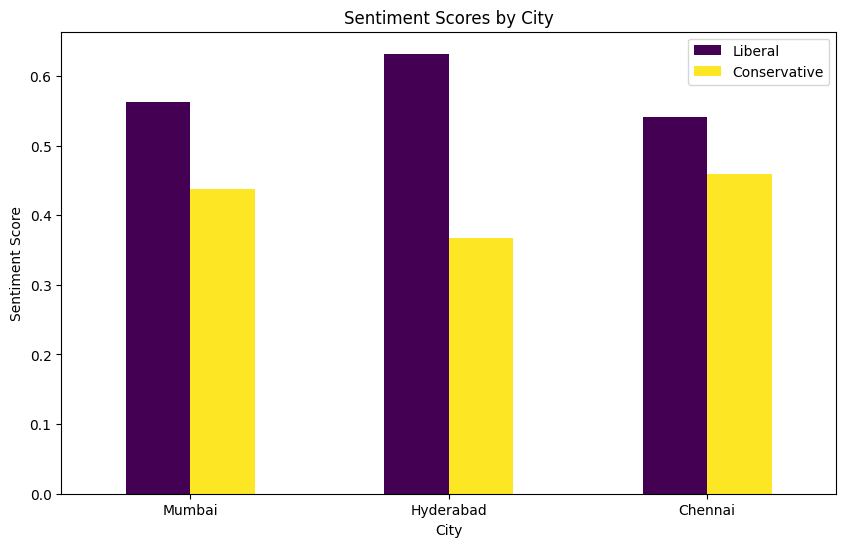

In [48]:
idg.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Scores by City')
plt.ylabel('Sentiment Score')
plt.xlabel('City')
plt.show()

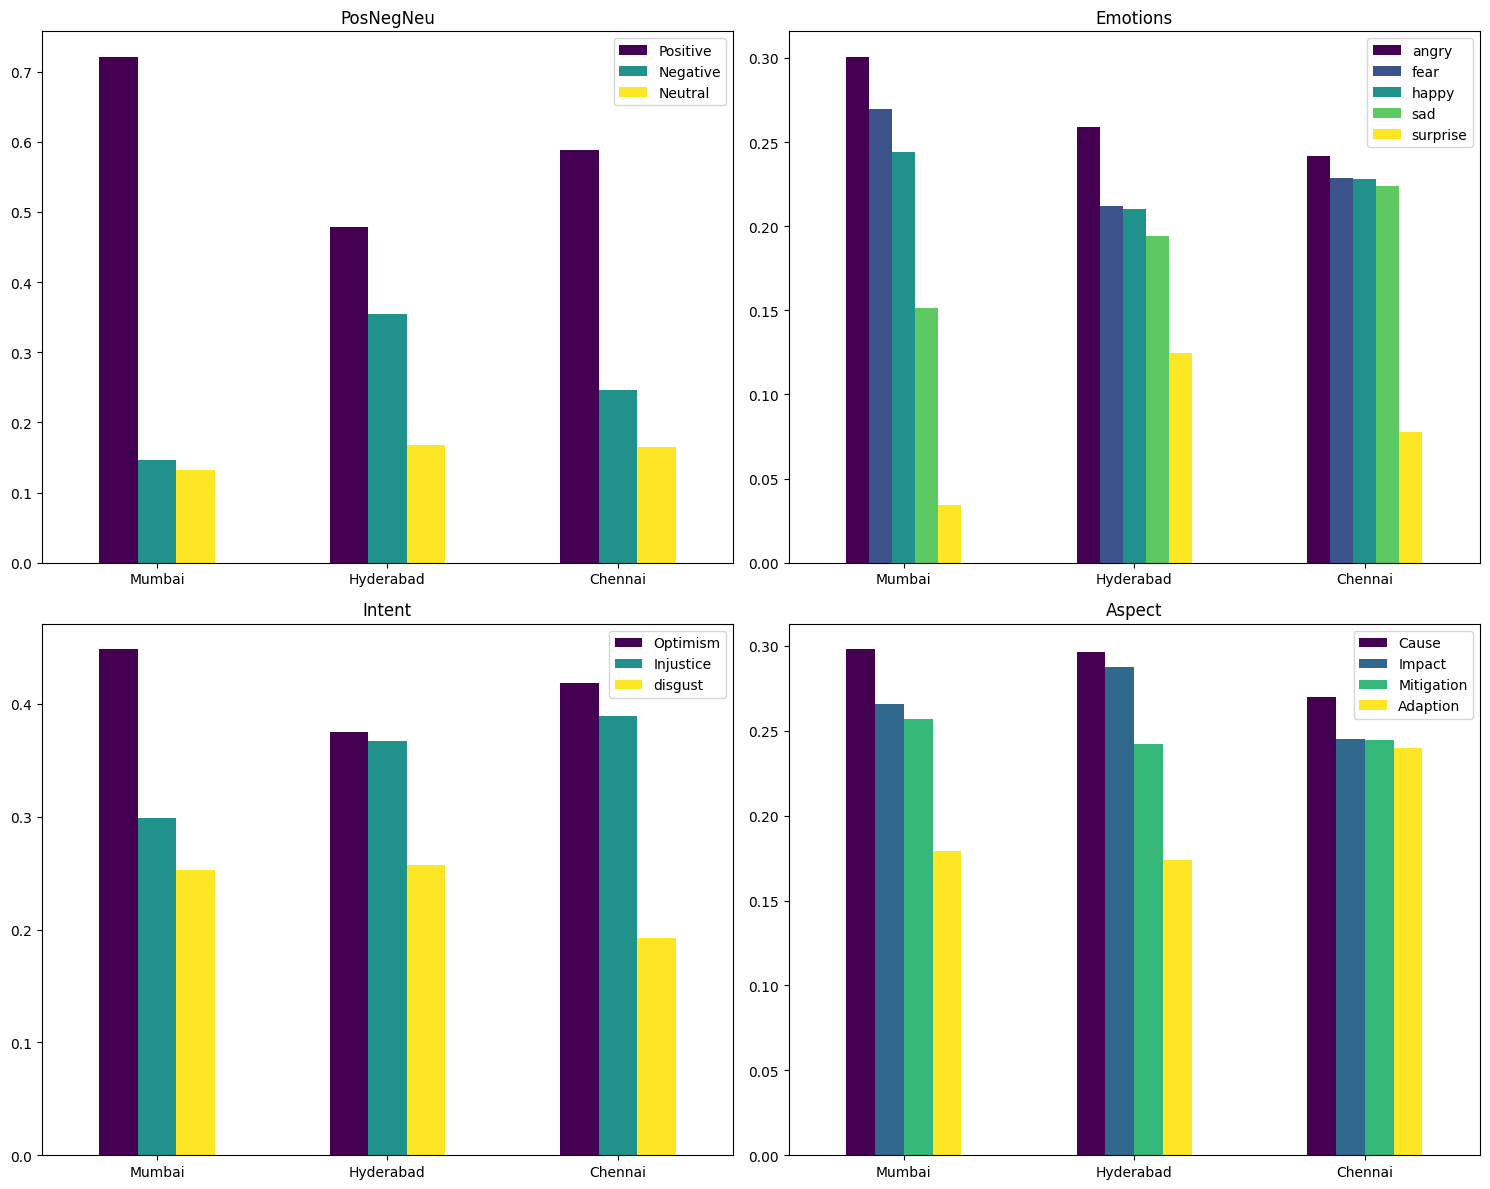

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

pnn.plot(ax=axes[0, 0],kind='bar', rot=0, colormap='viridis')
axes[0, 0].set_title('PosNegNeu')

emo.plot(ax=axes[0, 1],kind='bar', rot=0, colormap='viridis')
axes[0, 1].set_title('Emotions')


intt.plot(ax=axes[1, 0],kind='bar', rot=0, colormap='viridis')
axes[1, 0].set_title('Intent')

asp.plot(ax=axes[1, 1],kind='bar', rot=0, colormap='viridis')
axes[1, 1].set_title('Aspect')

plt.tight_layout()

plt.show()

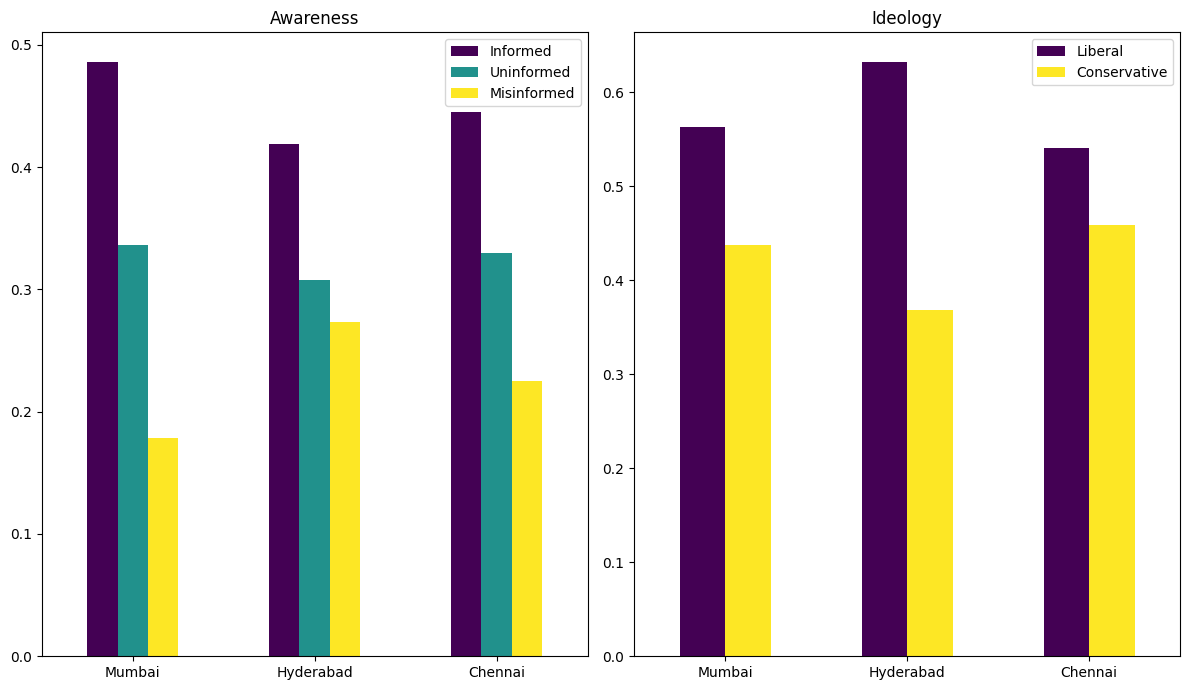

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))  # Define 1 row and 2 columns of subplots

awar.plot(ax=axes[0], kind='bar', rot=0, colormap='viridis')
axes[0].set_title('Awareness')

idg.plot(ax=axes[1], kind='bar', rot=0, colormap='viridis')
axes[1].set_title('Ideology')

plt.tight_layout()

plt.show()

#Non Parametric Test ( Kruskal-Wallis H test )

In [51]:
Final=pd.concat([pnn,emo,intt,asp,awar,idg], axis=1).T

In [52]:
Final

,Mumbai,Hyderabad,Chennai
Positive,0.721303,0.477839,0.588947
Negative,0.145927,0.353990,0.245992
Neutral,0.132771,0.168171,0.165061
angry,0.300774,0.258984,0.241694
fear,0.269666,0.212271,0.228847
happy,0.243836,0.209974,0.228139
sad,0.151542,0.193994,0.223882
surprise,0.034181,0.124776,0.077438
Optimism,0.448393,0.375340,0.418701
Injustice,0.299156,0.367376,0.388765


In [53]:
Final.describe()

,Mumbai,Hyderabad,Chennai
count,20.000000,20.000000,20.000000
mean,0.300000,0.300000,0.300000
std,0.163263,0.119741,0.131490
min,0.034181,0.124776,0.077438
25%,0.179036,0.211697,0.227395
50%,0.267621,0.280590,0.245074
75%,0.361226,0.367531,0.396249
max,0.721303,0.632003,0.588947


In [59]:
import scipy.stats as stats

# Perform the Kruskal-Wallis H test
statistic, p_value = stats.kruskal(Final['Mumbai'],Final['Hyderabad'], Final['Chennai'])

# Output the results
print("Kruskal-Wallis H Test:")
print("H-statistic =", statistic)
print("P-value =", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The differences between groups are statistically significant.")
else:
    print("No significant differences between groups were found.")


Kruskal-Wallis H Test:
H-statistic = 0.08491803278690213
P-value = 0.9584297446236002
No significant differences between groups were found.
